# MLP RNN 모델(다:1)
* DNN 모델을 RNN 모델로 변경할 때는 __input_shape__ 부분을 바구는 것이 가장 중요함 
* RNN의 다:다 모델(4:2) 

## 1. 데이터

In [1]:
import numpy as np

In [2]:
dataset = np.array([1,2,3,4,5,6,7,8,9,10])

#### 데이터 자르기 함수 

In [3]:
def split_xy2(dataset, time_steps, y_column):
    x, y = list(), list()
    for i in range(len(dataset)):
        x_end_number = i + time_steps
        y_end_number = x_end_number + y_column
        if y_end_number > len(dataset):
            break;
        tmp_x = dataset[i:x_end_number]
        tmp_y = dataset[x_end_number:y_end_number]
        x.append(tmp_x)
        y.append(tmp_y)
    return np.array(x), np.array(y)

* x는 4개씩, y는 2개씩 잘라서 사용 
* 데이터 입력 (?, 4, 1)
* 출력 (2, )

In [5]:
x, y = split_xy2(dataset, 4, 2)
print(x, "\n", y)
print(x.shape)
print(y.shape)

[[1 2 3 4]
 [2 3 4 5]
 [3 4 5 6]
 [4 5 6 7]
 [5 6 7 8]] 
 [[ 5  6]
 [ 6  7]
 [ 7  8]
 [ 8  9]
 [ 9 10]]
(5, 4)
(5, 2)


* RNN에 맞는 입력 모양을 고려해야 함 --> 2차원에서 3차원으로 변경이 필요함!!
* 3차원 형태(사용하는 용어)
    - (samples, time_step, feature)
    - (행, 열, 특성)
    - (행, 열, 피쳐)
    - (행, 열, 몇개씩 자르는지)
    - (샘플수, 타임스탭, 피쳐) 
    - (전체데이터수, 컬럼, 특성)
    - (전체데이터수, 컬럼, 몇개씩자르는지)
* RNN은 3차원, input_shape=(?,?)는 2차원 
    - input_shape가 2차원인 이유는 __"행무시"__ 때문
* (5,4,1)
    - 5는 행이므로 '행무시'
    - 4는 4개의 열을 
    - 1은 하나씩 잘라서 사용 

In [7]:
x = x.reshape(x.shape[0], x.shape[1], 1)
print(x.shape)

(5, 4, 1)


## 2. 모델 구성

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

* input_shape(4,1) : 4개의 컬럼을 1개씩 잘라서 쓰는 LSTM을 구성하겠다는 의미

In [9]:
model = Sequential()
model.add(LSTM(64, input_shape=(4, 1)))
model.add(Dense(2))   # y값이 2개이기 때문에 2로 설정 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 64)                16896     
_________________________________________________________________
dense (Dense)                (None, 2)                 130       
Total params: 17,026
Trainable params: 17,026
Non-trainable params: 0
_________________________________________________________________


## 3. 훈련

In [10]:
model.compile(loss='mse', optimizer='adam', metrics=['mse'])
hist = model.fit(x, y, epochs=1000, batch_size=1)

Train on 5 samples
Epoch 1/1000
5/5 [==============================] - 2s 453ms/sample - loss: 49.4377 - mse: 49.4377
Epoch 2/1000
5/5 [==============================] - 0s 3ms/sample - loss: 44.7177 - mse: 44.7177
Epoch 3/1000
5/5 [==============================] - 0s 3ms/sample - loss: 39.8666 - mse: 39.8666
Epoch 4/1000
5/5 [==============================] - 0s 3ms/sample - loss: 35.5622 - mse: 35.5622
Epoch 5/1000
5/5 [==============================] - 0s 3ms/sample - loss: 30.0526 - mse: 30.0526
Epoch 6/1000
5/5 [==============================] - 0s 3ms/sample - loss: 24.8029 - mse: 24.8029
Epoch 7/1000
5/5 [==============================] - 0s 3ms/sample - loss: 19.7671 - mse: 19.7671
Epoch 8/1000
5/5 [==============================] - 0s 3ms/sample - loss: 15.1206 - mse: 15.1206
Epoch 9/1000
5/5 [==============================] - 0s 3ms/sample - loss: 10.4055 - mse: 10.4055
Epoch 10/1000
5/5 [==============================] - 0s 3ms/sample - loss: 7.0535 - mse: 7.0535
Epoch 11/1

5/5 [==============================] - 0s 3ms/sample - loss: 0.1389 - mse: 0.1389
Epoch 87/1000
5/5 [==============================] - 0s 3ms/sample - loss: 0.1297 - mse: 0.1297
Epoch 88/1000
5/5 [==============================] - 0s 3ms/sample - loss: 0.1334 - mse: 0.1334
Epoch 89/1000
5/5 [==============================] - 0s 3ms/sample - loss: 0.1327 - mse: 0.1327  
Epoch 90/1000
5/5 [==============================] - 0s 3ms/sample - loss: 0.1343 - mse: 0.1343
Epoch 91/1000
5/5 [==============================] - 0s 3ms/sample - loss: 0.1349 - mse: 0.1349
Epoch 92/1000
5/5 [==============================] - 0s 3ms/sample - loss: 0.1365 - mse: 0.1365
Epoch 93/1000
5/5 [==============================] - 0s 3ms/sample - loss: 0.1354 - mse: 0.1354
Epoch 94/1000
5/5 [==============================] - 0s 3ms/sample - loss: 0.1266 - mse: 0.1266
Epoch 95/1000
5/5 [==============================] - 0s 3ms/sample - loss: 0.1325 - mse: 0.1325
Epoch 96/1000
5/5 [==============================] -

5/5 [==============================] - 0s 3ms/sample - loss: 0.0612 - mse: 0.0612
Epoch 171/1000
5/5 [==============================] - 0s 3ms/sample - loss: 0.0601 - mse: 0.0601
Epoch 172/1000
5/5 [==============================] - 0s 3ms/sample - loss: 0.0636 - mse: 0.0636
Epoch 173/1000
5/5 [==============================] - 0s 3ms/sample - loss: 0.0581 - mse: 0.0581  
Epoch 174/1000
5/5 [==============================] - 0s 3ms/sample - loss: 0.0736 - mse: 0.0736
Epoch 175/1000
5/5 [==============================] - 0s 3ms/sample - loss: 0.0620 - mse: 0.0620
Epoch 176/1000
5/5 [==============================] - 0s 3ms/sample - loss: 0.0712 - mse: 0.0712
Epoch 177/1000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0626 - mse: 0.0626
Epoch 178/1000
5/5 [==============================] - 0s 3ms/sample - loss: 0.0571 - mse: 0.0571
Epoch 179/1000
5/5 [==============================] - 0s 3ms/sample - loss: 0.0551 - mse: 0.0551
Epoch 180/1000
5/5 [=======================

5/5 [==============================] - 0s 3ms/sample - loss: 0.0335 - mse: 0.0335
Epoch 255/1000
5/5 [==============================] - 0s 3ms/sample - loss: 0.0270 - mse: 0.0270
Epoch 256/1000
5/5 [==============================] - 0s 3ms/sample - loss: 0.0215 - mse: 0.0215
Epoch 257/1000
5/5 [==============================] - 0s 3ms/sample - loss: 0.0227 - mse: 0.0227
Epoch 258/1000
5/5 [==============================] - 0s 3ms/sample - loss: 0.0200 - mse: 0.0200
Epoch 259/1000
5/5 [==============================] - 0s 3ms/sample - loss: 0.0174 - mse: 0.0174
Epoch 260/1000
5/5 [==============================] - 0s 3ms/sample - loss: 0.0152 - mse: 0.0152
Epoch 261/1000
5/5 [==============================] - 0s 3ms/sample - loss: 0.0180 - mse: 0.0180
Epoch 262/1000
5/5 [==============================] - 0s 3ms/sample - loss: 0.0151 - mse: 0.0151
Epoch 263/1000
5/5 [==============================] - 0s 3ms/sample - loss: 0.0233 - mse: 0.0233
Epoch 264/1000
5/5 [=========================

5/5 [==============================] - 0s 3ms/sample - loss: 0.0039 - mse: 0.0039  
Epoch 339/1000
5/5 [==============================] - 0s 3ms/sample - loss: 0.0032 - mse: 0.0032
Epoch 340/1000
5/5 [==============================] - 0s 3ms/sample - loss: 0.0040 - mse: 0.0040
Epoch 341/1000
5/5 [==============================] - 0s 3ms/sample - loss: 0.0048 - mse: 0.0048
Epoch 342/1000
5/5 [==============================] - 0s 3ms/sample - loss: 0.0012 - mse: 0.0012
Epoch 343/1000
5/5 [==============================] - 0s 3ms/sample - loss: 0.0031 - mse: 0.0031
Epoch 344/1000
5/5 [==============================] - 0s 3ms/sample - loss: 0.0024 - mse: 0.0024  
Epoch 345/1000
5/5 [==============================] - 0s 2ms/sample - loss: 0.0027 - mse: 0.0027
Epoch 346/1000
5/5 [==============================] - 0s 3ms/sample - loss: 0.0019 - mse: 0.0019  
Epoch 347/1000
5/5 [==============================] - 0s 3ms/sample - loss: 0.0026 - mse: 0.0026
Epoch 348/1000
5/5 [===================

5/5 [==============================] - 0s 3ms/sample - loss: 4.9459e-04 - mse: 4.9459e-04
Epoch 419/1000
5/5 [==============================] - 0s 3ms/sample - loss: 6.5624e-04 - mse: 6.5624e-04
Epoch 420/1000
5/5 [==============================] - 0s 3ms/sample - loss: 8.6830e-04 - mse: 8.6830e-04
Epoch 421/1000
5/5 [==============================] - 0s 3ms/sample - loss: 4.2915e-04 - mse: 4.2915e-04
Epoch 422/1000
5/5 [==============================] - 0s 3ms/sample - loss: 2.9213e-04 - mse: 2.9213e-04
Epoch 423/1000
5/5 [==============================] - 0s 3ms/sample - loss: 2.5926e-04 - mse: 2.5926e-04
Epoch 424/1000
5/5 [==============================] - 0s 3ms/sample - loss: 3.0092e-04 - mse: 3.0092e-04
Epoch 425/1000
5/5 [==============================] - 0s 3ms/sample - loss: 4.7144e-04 - mse: 4.7144e-04
Epoch 426/1000
5/5 [==============================] - 0s 3ms/sample - loss: 4.2858e-04 - mse: 4.2858e-04
Epoch 427/1000
5/5 [==============================] - 0s 3ms/sample - 

5/5 [==============================] - 0s 3ms/sample - loss: 3.7200e-04 - mse: 3.7200e-04
Epoch 497/1000
5/5 [==============================] - 0s 3ms/sample - loss: 2.9384e-04 - mse: 2.9384e-04
Epoch 498/1000
5/5 [==============================] - 0s 3ms/sample - loss: 5.0969e-04 - mse: 5.0969e-04
Epoch 499/1000
5/5 [==============================] - 0s 3ms/sample - loss: 3.4352e-04 - mse: 3.4352e-04
Epoch 500/1000
5/5 [==============================] - 0s 3ms/sample - loss: 4.9203e-04 - mse: 4.9203e-04
Epoch 501/1000
5/5 [==============================] - 0s 3ms/sample - loss: 1.7175e-04 - mse: 1.7175e-04
Epoch 502/1000
5/5 [==============================] - 0s 2ms/sample - loss: 4.8889e-04 - mse: 4.8889e-04
Epoch 503/1000
5/5 [==============================] - 0s 3ms/sample - loss: 2.1903e-04 - mse: 2.1903e-04
Epoch 504/1000
5/5 [==============================] - 0s 3ms/sample - loss: 3.2475e-04 - mse: 3.2475e-04
Epoch 505/1000
5/5 [==============================] - 0s 3ms/sample - 

5/5 [==============================] - 0s 3ms/sample - loss: 0.0018 - mse: 0.0018
Epoch 576/1000
5/5 [==============================] - 0s 3ms/sample - loss: 0.0013 - mse: 0.0013
Epoch 577/1000
5/5 [==============================] - 0s 3ms/sample - loss: 8.8590e-04 - mse: 8.8590e-04
Epoch 578/1000
5/5 [==============================] - 0s 3ms/sample - loss: 0.0025 - mse: 0.0025
Epoch 579/1000
5/5 [==============================] - 0s 3ms/sample - loss: 0.0016 - mse: 0.0016  
Epoch 580/1000
5/5 [==============================] - 0s 3ms/sample - loss: 0.0017 - mse: 0.0017  
Epoch 581/1000
5/5 [==============================] - 0s 3ms/sample - loss: 0.0018 - mse: 0.0018  
Epoch 582/1000
5/5 [==============================] - 0s 3ms/sample - loss: 3.0318e-04 - mse: 3.0318e-04
Epoch 583/1000
5/5 [==============================] - 0s 3ms/sample - loss: 2.6383e-04 - mse: 2.6383e-04
Epoch 584/1000
5/5 [==============================] - 0s 3ms/sample - loss: 7.6842e-04 - mse: 7.6842e-04
Epoch 5

5/5 [==============================] - 0s 2ms/sample - loss: 1.1795e-04 - mse: 1.1795e-04
Epoch 655/1000
5/5 [==============================] - 0s 3ms/sample - loss: 1.1139e-04 - mse: 1.1139e-04
Epoch 656/1000
5/5 [==============================] - 0s 3ms/sample - loss: 1.0838e-04 - mse: 1.0838e-04
Epoch 657/1000
5/5 [==============================] - 0s 3ms/sample - loss: 2.5779e-04 - mse: 2.5779e-04
Epoch 658/1000
5/5 [==============================] - 0s 3ms/sample - loss: 3.6506e-05 - mse: 3.6506e-05
Epoch 659/1000
5/5 [==============================] - 0s 3ms/sample - loss: 1.5704e-04 - mse: 1.5704e-04
Epoch 660/1000
5/5 [==============================] - 0s 3ms/sample - loss: 8.4967e-05 - mse: 8.4967e-05
Epoch 661/1000
5/5 [==============================] - 0s 3ms/sample - loss: 3.4250e-04 - mse: 3.4250e-04
Epoch 662/1000
5/5 [==============================] - 0s 3ms/sample - loss: 9.5563e-05 - mse: 9.5563e-05
Epoch 663/1000
5/5 [==============================] - 0s 3ms/sample - 

5/5 [==============================] - 0s 3ms/sample - loss: 2.0850e-04 - mse: 2.0850e-04
Epoch 733/1000
5/5 [==============================] - 0s 3ms/sample - loss: 1.3182e-04 - mse: 1.3182e-04
Epoch 734/1000
5/5 [==============================] - 0s 3ms/sample - loss: 2.7712e-04 - mse: 2.7712e-04
Epoch 735/1000
5/5 [==============================] - 0s 3ms/sample - loss: 1.3832e-04 - mse: 1.3832e-04
Epoch 736/1000
5/5 [==============================] - 0s 3ms/sample - loss: 1.0650e-04 - mse: 1.0650e-04
Epoch 737/1000
5/5 [==============================] - 0s 3ms/sample - loss: 7.6986e-05 - mse: 7.6986e-05
Epoch 738/1000
5/5 [==============================] - 0s 3ms/sample - loss: 1.2170e-04 - mse: 1.2170e-04
Epoch 739/1000
5/5 [==============================] - 0s 3ms/sample - loss: 9.5154e-05 - mse: 9.5154e-05
Epoch 740/1000
5/5 [==============================] - 0s 2ms/sample - loss: 1.1168e-04 - mse: 1.1168e-04
Epoch 741/1000
5/5 [==============================] - 0s 3ms/sample - 

Epoch 812/1000
5/5 [==============================] - 0s 3ms/sample - loss: 2.6113e-04 - mse: 2.6113e-04
Epoch 813/1000
5/5 [==============================] - 0s 3ms/sample - loss: 1.6772e-04 - mse: 1.6772e-04
Epoch 814/1000
5/5 [==============================] - 0s 3ms/sample - loss: 2.5026e-04 - mse: 2.5026e-04
Epoch 815/1000
5/5 [==============================] - 0s 2ms/sample - loss: 1.9834e-04 - mse: 1.9834e-04
Epoch 816/1000
5/5 [==============================] - 0s 3ms/sample - loss: 3.4795e-04 - mse: 3.4795e-04
Epoch 817/1000
5/5 [==============================] - 0s 3ms/sample - loss: 3.0890e-04 - mse: 3.0890e-04
Epoch 818/1000
5/5 [==============================] - 0s 3ms/sample - loss: 2.9239e-04 - mse: 2.9239e-04
Epoch 819/1000
5/5 [==============================] - 0s 3ms/sample - loss: 1.7688e-04 - mse: 1.7688e-04
Epoch 820/1000
5/5 [==============================] - 0s 3ms/sample - loss: 1.7029e-04 - mse: 1.7029e-04
Epoch 821/1000
5/5 [==============================] - 0

5/5 [==============================] - 0s 3ms/sample - loss: 0.0018 - mse: 0.0018
Epoch 891/1000
5/5 [==============================] - 0s 3ms/sample - loss: 6.4283e-04 - mse: 6.4283e-04
Epoch 892/1000
5/5 [==============================] - 0s 3ms/sample - loss: 1.5725e-04 - mse: 1.5725e-04
Epoch 893/1000
5/5 [==============================] - 0s 3ms/sample - loss: 1.9373e-04 - mse: 1.9373e-04
Epoch 894/1000
5/5 [==============================] - 0s 3ms/sample - loss: 1.9245e-04 - mse: 1.9245e-04
Epoch 895/1000
5/5 [==============================] - 0s 3ms/sample - loss: 1.7929e-04 - mse: 1.7929e-04
Epoch 896/1000
5/5 [==============================] - 0s 3ms/sample - loss: 9.6751e-05 - mse: 9.6751e-05
Epoch 897/1000
5/5 [==============================] - 0s 3ms/sample - loss: 7.5737e-05 - mse: 7.5737e-05
Epoch 898/1000
5/5 [==============================] - 0s 3ms/sample - loss: 7.2426e-05 - mse: 7.2426e-05
Epoch 899/1000
5/5 [==============================] - 0s 3ms/sample - loss: 3.

Epoch 969/1000
5/5 [==============================] - 0s 3ms/sample - loss: 7.9696e-04 - mse: 7.9696e-04
Epoch 970/1000
5/5 [==============================] - 0s 3ms/sample - loss: 0.0015 - mse: 0.0015  
Epoch 971/1000
5/5 [==============================] - 0s 3ms/sample - loss: 0.0029 - mse: 0.0029
Epoch 972/1000
5/5 [==============================] - 0s 3ms/sample - loss: 0.0010 - mse: 0.0010  
Epoch 973/1000
5/5 [==============================] - 0s 3ms/sample - loss: 0.0071 - mse: 0.0071
Epoch 974/1000
5/5 [==============================] - 0s 3ms/sample - loss: 0.0030 - mse: 0.0030  
Epoch 975/1000
5/5 [==============================] - 0s 3ms/sample - loss: 3.4897e-04 - mse: 3.4897e-04
Epoch 976/1000
5/5 [==============================] - 0s 3ms/sample - loss: 0.0021 - mse: 0.0021
Epoch 977/1000
5/5 [==============================] - 0s 3ms/sample - loss: 0.0013 - mse: 0.0013  
Epoch 978/1000
5/5 [==============================] - 0s 3ms/sample - loss: 0.0018 - mse: 0.0018  
Epoc

## 4. 학습과정확인

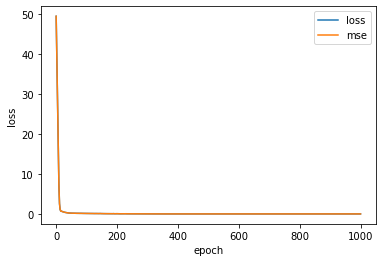

In [11]:
import matplotlib.pyplot as plt
# print(hist.history)
plt.plot(hist.history['loss'])
plt.plot(hist.history['mse'])
# #plt.ylim(0.0, 1.5)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'mse'], loc='upper right')
plt.show()

## 5. 평가 예측
* 예측값 데이터로 사용하기 위해 모양을 맞춰줘야 한다.(3차원!!)

In [14]:
loss, mse = model.evaluate(x, y )
print("loss : ", loss)
print("mse : ", mse)

5/5 [==============================] - 0s 4ms/sample - loss: 0.0019 - mse: 0.0019
loss :  0.0019323047017678618
mse :  0.0019323047


In [15]:
x_predict = np.array([6,7,8,9])
print(x_predict.shape) 
x_predict = x_predict.reshape(1, x_predict.shape[0], 1)
print(x_predict.shape)

(4,)
(1, 4, 1)


* mse :  0.0019323047 로 상당히 좋은 결과인 경우 
* 실제 10과 11을 예상하고 예측값 :  [[ 9.847791 10.836728]] 얻음

In [16]:
y_predict = model.predict(x_predict)
print("예측값 : ", y_predict)

예측값 :  [[ 9.847791 10.836728]]
